**Al Winmon Benedict T. Montebon     BSCS - 1     
CIS 1203 Group 2 TTh 12:00-1:30pm
LECTURE 2**


# $\textbf{Programming Assignment}$


**$\textbf{1. Kruskal's Algorithm}$**

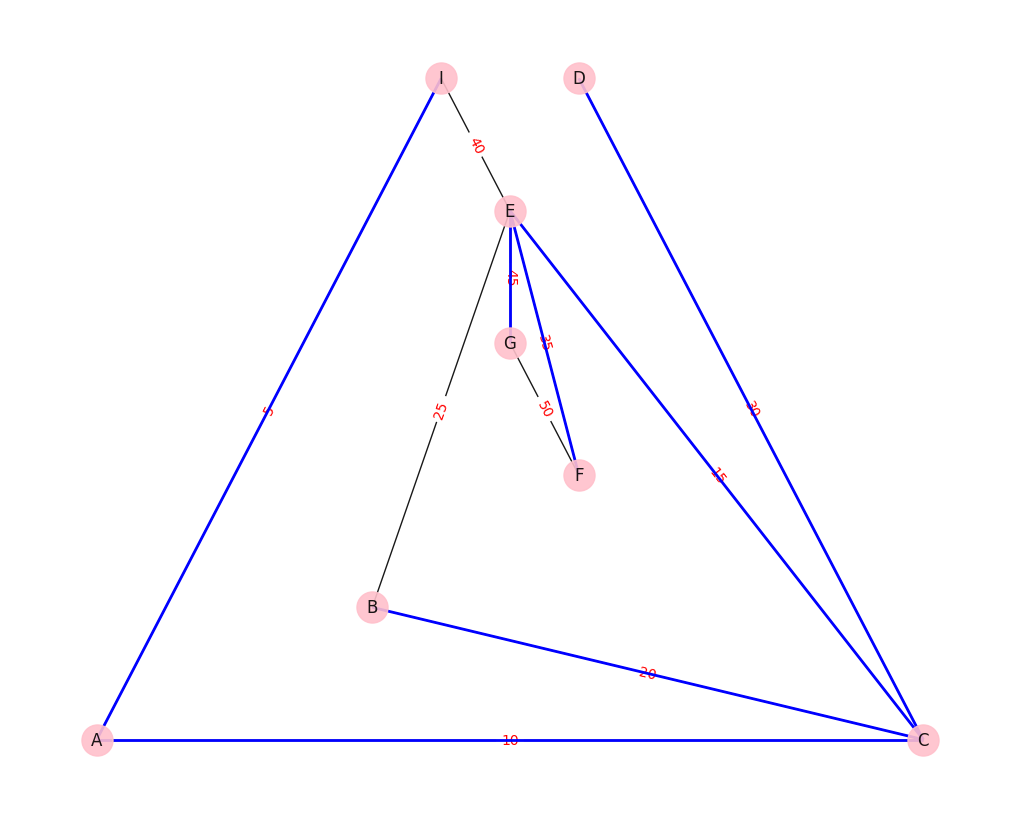

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])

edgelist = [
    ("A", "C", 10),
    ("A", "I", 5),
    ("C", "B", 20),
    ("C", "E", 15),
    ("C", "D", 30),
    ("B", "E", 25),
    ("I", "E", 40),
    ("E", "F", 35),
    ("F", "G", 50),
    ("G", "E", 45)
]

G.add_weighted_edges_from(edgelist)

mst = nx.minimum_spanning_tree(G)

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='pink', alpha=0.9, edge_color='black', width=1, linewidths=1)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

nx.draw_networkx_edges(mst, pos, edge_color='blue', width=2)

plt.show()


$\textbf{Kruskal's Algorithm Table}$

\begin{array}{|c|c|c|c|c|}
\hline
Iteration Number & Edge Considered & Weight & Action Taken \\
1                & (A, I)          & 5     & Added        \\
2                & (A, C)          & 10      & Added        \\
3                & (C, E)          & 15     & Added       \\
4                & (B, C)          & 20     & Added       \\
5                & (B, E)          & 25     & Ignored   \\
6                & (C, D)          & 30     & Added       \\
7                & (E, F)          & 35     & Added   \\
8                & (E, I)          & 40     & Ignored      \\
9                & (E, G)          & 45     & Added       \\
10               & (F, G)          & 50     & Ignored   \\
\hline
\end{array}


**$\textbf{2. Prim's Algorithm}$**

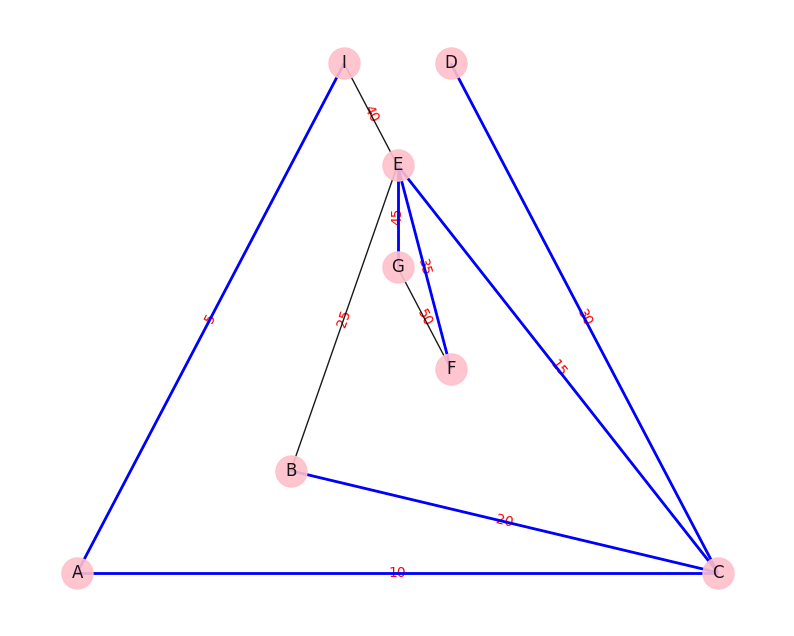

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

def prim(G, start):
    T = nx.Graph()
    T.add_node(start)
    while set(T.nodes()) != set(G.nodes()):
        nodes_to_iterate = list(T.nodes())
        min_edge = None
        min_weight = float('inf')
        for n in nodes_to_iterate:
            for e in G.edges(n):
                if e[1] not in T.nodes():
                    T.add_edge(e[0], e[1])
    return T

seed = 55
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)

T_prim = prim(G, 'A')
pos = nx.planar_layout(G)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

nx.draw_networkx_edges(
    T_prim, pos, edgelist=T_prim.edges(), edge_color='blue', width=2
)

plt.show()

$\textbf{Solution}$

\begin{array}{|c|c|c|c|}
\hline
Iteration & Vertex Added & Edge Added & Weight \\
\hline
0 & I & & \\
1 & A & (I, A) & 5 \\
2 & C & (A, C) & 10 \\
3 & E & (C, E) & 15 \\
4 & B & (C, B) & 20 \\
5 & D & (C, D) & 30 \\
6 & F & (E, F) & 35 \\
7 & G & (E, G) & 45 \\
\hline
\end{array}


**$\textbf{3. Djitraka's Shortest Path Algorithm}$**

Shortest paths from node A:
To node A: ['A']
To node C: ['A', 'C']
To node I: ['A', 'I']
To node B: ['A', 'C', 'B']
To node E: ['A', 'C', 'E']
To node D: ['A', 'C', 'D']
To node F: ['A', 'C', 'E', 'F']
To node G: ['A', 'C', 'E', 'G']


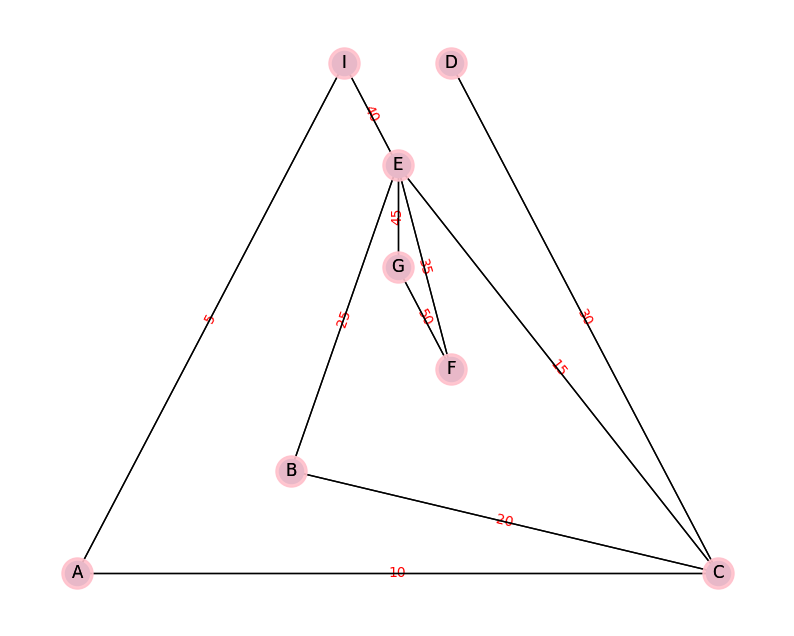

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Apply Dijkstra's shortest path algorithm
shortest_paths = nx.single_source_dijkstra_path(G, "A")

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos, with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

# Print shortest paths
print("Shortest paths from node A:")
for node in shortest_paths:
    print(f"To node {node}: {shortest_paths[node]}")

plt.show()


$\textbf{From Node A (Step 1):}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 0 \\
    \hline
    B & \infty \\
    \hline
    C & \infty \\
    \hline
    D & \infty \\
    \hline
    E & \infty \\
    \hline
    F & \infty \\
    \hline
    G & \infty \\
    \hline
    I & \infty \\
    \hline
\end{array}



$\textbf{From Node A (Step 2):}$



\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 0 \\
    \hline
    B & 30 \\
    \hline
    C & 10 \\
    \hline
    D & 40 \\
    \hline
    E & 25 \\
    \hline
    F & \infty \\
    \hline
    G & \infty \\
    \hline
    I & 5 \\
    \hline
\end{array}





$\textbf{From Node A (Step 3):}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 0 \\
    \hline
    B & 30 \\
    \hline
    C & 10 \\
    \hline
    D & 40 \\
    \hline
    E & 25 \\
    \hline
    F & 60 \\
    \hline
    G & \infty \\
    \hline
    I & 5 \\
    \hline
\end{array}

$\textbf{From Node A (Step 4):}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 0 \\
    \hline
    B & 30 \\
    \hline
    C & 10 \\
    \hline
    D & 40 \\
    \hline
    E & 25 \\
    \hline
    F & 60 \\
    \hline
    G & 70 \\
    \hline
    I & 5 \\
    \hline
\end{array}